# Assignment 1, Question 5

This notebook defines the code necessary to answer Q5 from assignment 1.


Define a function that does cross-validation using a polynomial basis of specified order, given a dataset.

The function takes arguments 

```
x: independent variable (float)
y: dependent variable (float)
nfolds: the number of folds to use in the cross-validation (integer)
polyorder: the maximum power to use in the polynomial basis (integer)
```

Note that the function does not perform any error checking on the inputs.



In [1]:
# Define the cross-validation function

import numpy as np
np.random.seed(123123)

def cross_validate(x, y, nfolds=5, polyorder=1):
    D = np.concatenate([x.T,y.T],axis=1)
    D = np.random.permutation(D)
    Folds =  np.array_split(D, nfolds)
    TrainingError = []
    ValidationError = []
    for i, value in enumerate(Folds):
        ValidationSet = value
        TrainingSet = np.concatenate(Folds[:i]+Folds[i+1:])
        PhiTrain = np.array([pow(TrainingSet[:,0],j) for j in range(0,polyorder+1)]).transpose()
        PhiValid = np.array([pow(ValidationSet[:,0],j) for j in range(0,polyorder+1)]).transpose()
        # Train the model
        w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),TrainingSet[:,1]))
        # Compute the error on the training set
        TrainingError.append(np.sqrt(np.average(pow(TrainingSet[:,1]-np.matmul(PhiTrain,w),2))))
        # Compute the error on the validation set
        ValidationError.append(np.sqrt(np.average(pow(ValidationSet[:,1]-np.matmul(PhiValid,w),2))))
    MeanTrainingError = np.mean(TrainingError)
    MeanValidationError = np.mean(ValidationError)
    print("* Polynomial order {0:d}".format(polyorder))
    print("* Mean Training RMS Error {0:8.3f}".format(MeanTrainingError))
    print("* Mean Validation RMS Error {0:8.3f}".format(MeanValidationError))
    return MeanTrainingError, MeanValidationError


Define and plot the data

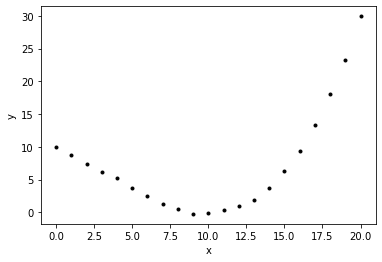

In [2]:
import matplotlib.pyplot as plt
x = np.array([[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]])
y = np.array([[10.05, 8.81, 7.34, 6.11, 5.26, 3.69, 2.57, 1.31, 0.54, -0.23, -0.10, 0.43, 1.04, 1.95, 3.66, 6.33, 9.31, 13.38, 18.02, 23.32, 29.92]])
plt.plot(x,y,'k.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Run the cross-validation function for 5 folds with a zero-th order polynomial (i.e. $f(x) = w_0$)

In [3]:
for i in range(10):
    t, v = cross_validate(x,y,5,i)

* Polynomial order 0
* Mean Training RMS Error    7.728
* Mean Validation RMS Error    7.819
* Polynomial order 1
* Mean Training RMS Error    6.618
* Mean Validation RMS Error    7.809
* Polynomial order 2
* Mean Training RMS Error    1.631
* Mean Validation RMS Error    2.095
* Polynomial order 3
* Mean Training RMS Error    0.163
* Mean Validation RMS Error    0.178
* Polynomial order 4
* Mean Training RMS Error    0.158
* Mean Validation RMS Error    0.227
* Polynomial order 5
* Mean Training RMS Error    0.152
* Mean Validation RMS Error    0.377
* Polynomial order 6
* Mean Training RMS Error    0.149
* Mean Validation RMS Error    0.269
* Polynomial order 7
* Mean Training RMS Error    0.127
* Mean Validation RMS Error    0.508
* Polynomial order 8
* Mean Training RMS Error    0.126
* Mean Validation RMS Error    1.115
* Polynomial order 9
* Mean Training RMS Error    0.094
* Mean Validation RMS Error    1.056
